In [1]:
import tensorflow as tf
import keras
from keras.layers import Input, Lambda,subtract,GlobalMaxPooling2D,Dense,GlobalAveragePooling2D, concatenate, Activation
from keras.applications.mobilenet import MobileNet as Net
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from keras.layers import Input, merge
from keras.optimizers import Adam
import cv2
import numpy as np
import os
import pickle
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input,Lambda,subtract,GlobalMaxPooling2D,Dense,GlobalAveragePooling2D,concatenate,Activation
from keras.applications.xception import Xception as Net
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from keras.models import Model
ALPHA = 0.7 # Triplet Loss Parameter

/Applications/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# run the script containing all framework related functions
%run fn_utils.py

In [3]:
# load the CNN model
pretrained_model= keras.applications.mobilenet.MobileNet()
layers_needed=pretrained_model.layers[0:82]
#Defining the Sequential model
baseline_model=Sequential()
for layer in layers_needed:
    baseline_model.add(layer)
    
layers_to_not_train= baseline_model.layers[0:79]

for layer in layers_to_not_train:
    layer.trainable=False
    
triplet_model=create_model_new(128, 128, 3, baseline_model)
triplet_model.load_weights('/Users/ochhab3/Documents/ojaswinich_github/signature_verification/model_weights/triplet_weights_new_e3.h5')

/Users/ochhab3/Documents/ojaswinich_github/signature_verification/fn_utils.py:71: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  loss = merge([anchor, positive, negative], mode=triplet_loss, output_shape=(1,))
/Applications/anaconda/lib/python3.6/site-packages/keras/legacy/layers.py:458: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
anchor (InputLayer)             (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
positive (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
negative (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             3228864     anchor[0][0]                     
                                                                 positive[0][0]                   
          

In [4]:
#Find the embeddings from the cnn_model
cnn_model = Model(inputs=triplet_model.input,
                                 outputs=triplet_model.get_layer('global_max_pooling2d_1').output)

In [5]:
# load the logistic model
log_model_loaction='/Users/ochhab3/Documents/ojaswinich_github/signature_verification/model_weights/log_model_e3.pkl'
log_model_saved=open(log_model_loaction, 'rb')
log_model=pickle.load(log_model_saved)

In [6]:
# create an empty database at the start. This is a dictionary that we will keep adding new IDs to.
database={}

In [7]:
# give the image path and the imade ID to be tested
image_path='/Users/ochhab3/Documents/ojaswinich_github/signature_verification/images/ojas_gen/IMG_3206.JPG'
image_id = 'ojas'

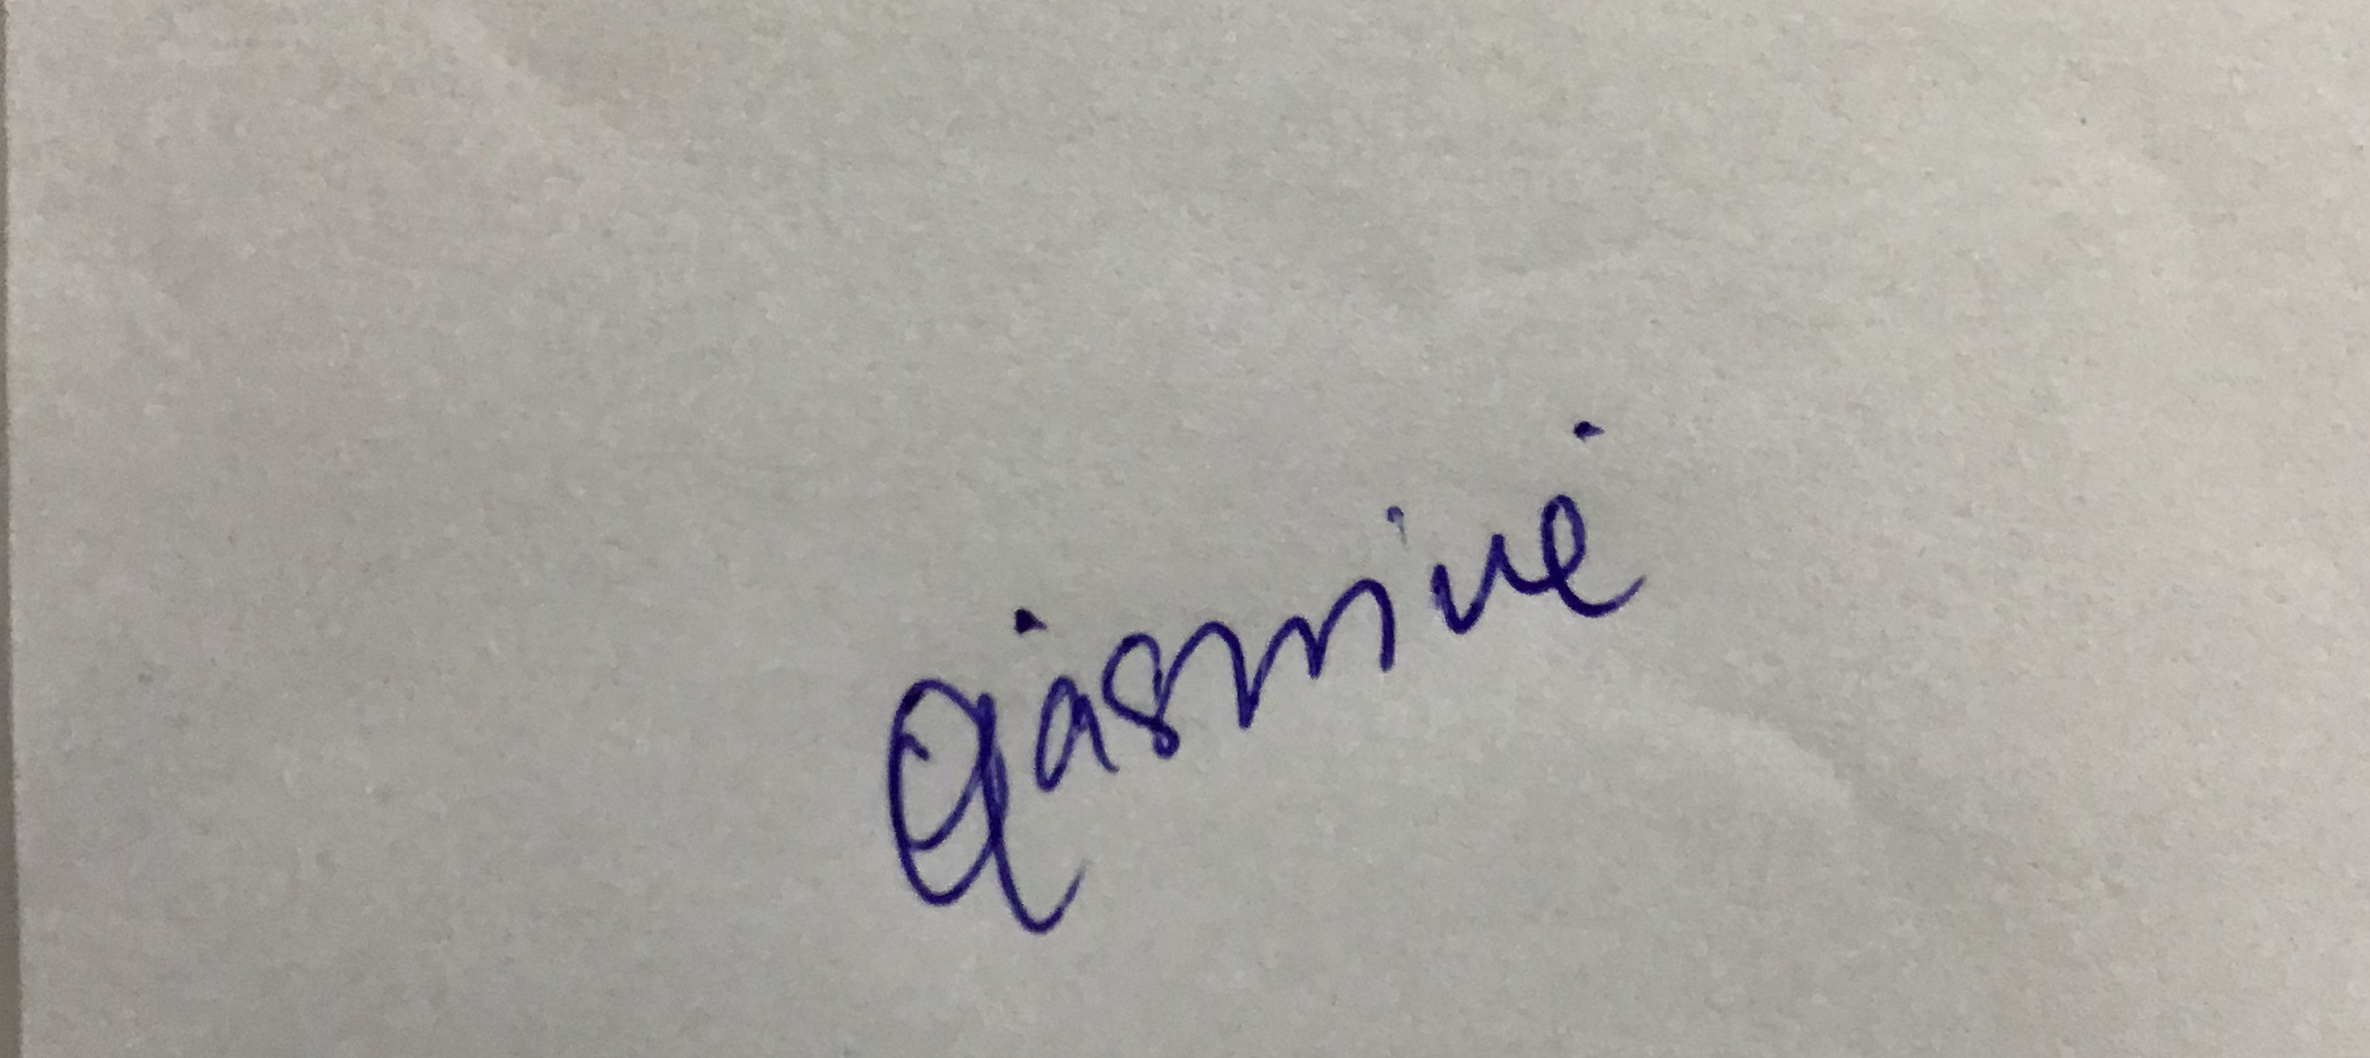

Added the new ID to the database with embedding.


In [8]:
# This will add the image to the database if the ID does not already exist in the database.
# If the ID provided already exists in the database, then the new image provided in the image 
# path will be tested against the image in the database corresponding to the ID.
# The framework will take the difference in the embeddings from the CNN model and pass through the 
# logistic model to give the final result class.
# If the prediction output is genuine class, then the framework will display 'This is a genuine signature.'
# If the prediction output is forged class, then the framework will display 'This is a forged signature.'

database = final_framework(database, image_path, image_id, cnn_model, log_model)

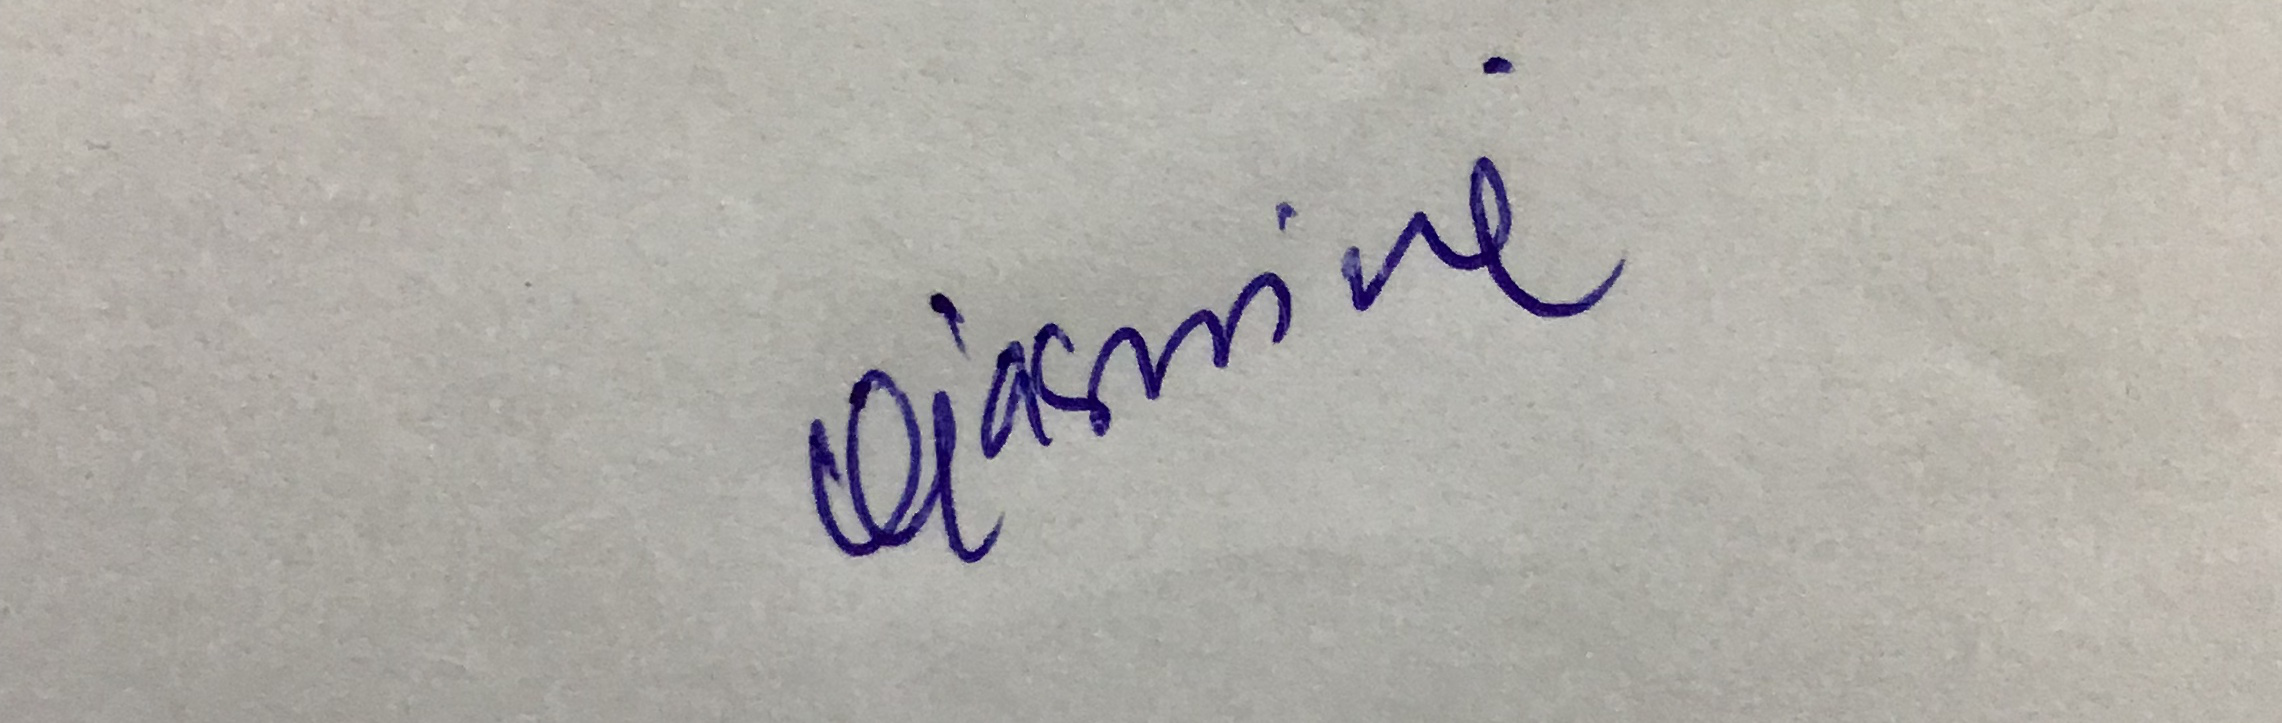

This is a genuine signature.


In [9]:
# give another GENUINE image with same id to be tested against the id = 'ojas
image_path='/Users/ochhab3/Documents/ojaswinich_github/signature_verification/images/ojas_gen/IMG_2028.JPG'
image_id = 'ojas'
database = final_framework(database, image_path, image_id, cnn_model, log_model)

In [10]:
# this was another genuine signature that got correctly classified as genuine.

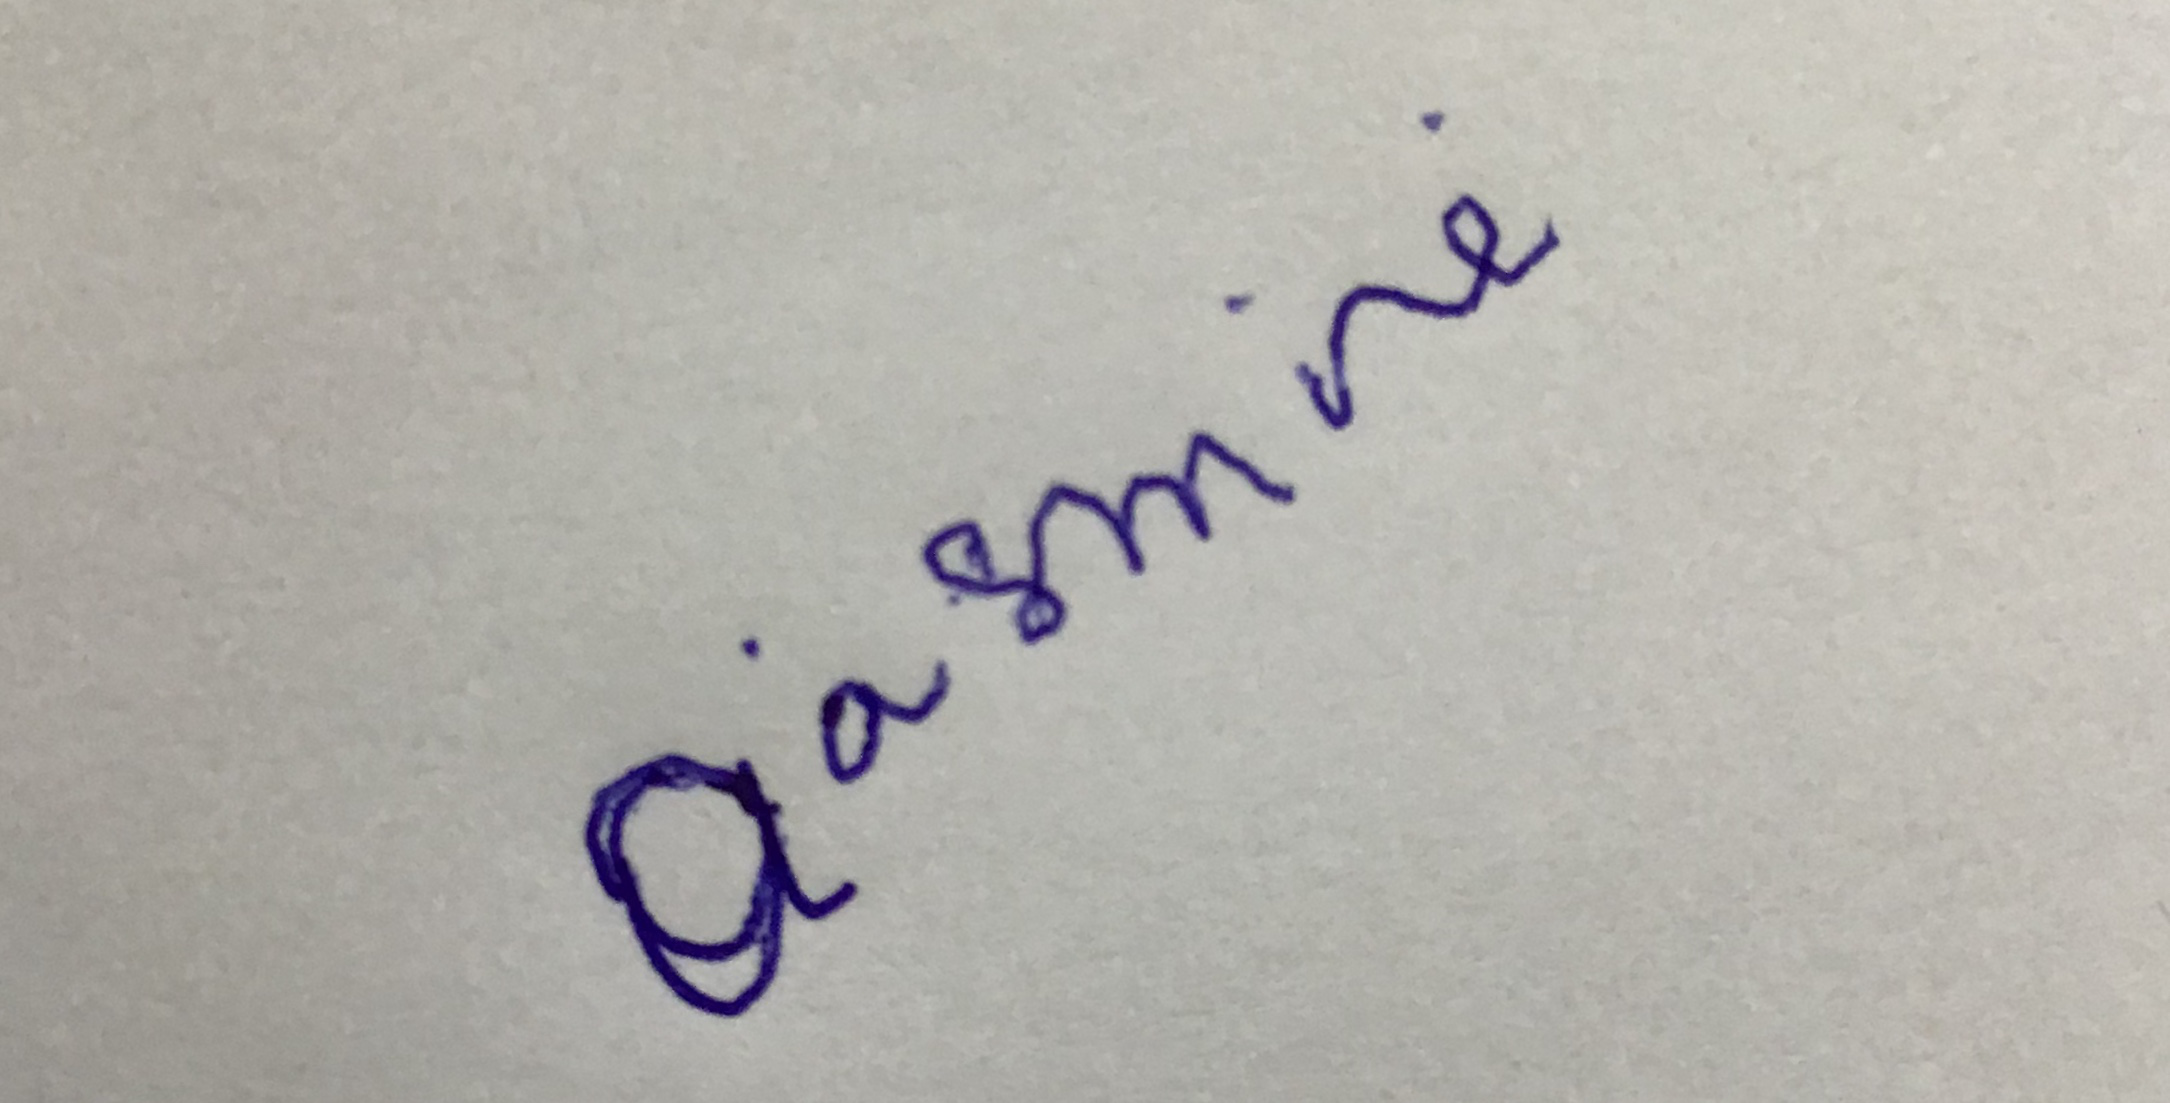

This is a forged signature.


In [11]:
# give a FORGED signaute image with same id to be tested against the id = 'ojas
image_path='/Users/ochhab3/Documents/ojaswinich_github/signature_verification/images/ojas_forge/IMG_7718.JPG'
image_id = 'ojas'
database = final_framework(database, image_path, image_id, cnn_model, log_model)

In [12]:
# this was a forged signature that got correctly classified as forged.